# Neural Networks(Assignment)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
df = pd.read_csv('Alphabets_data.csv')

In [3]:
df.shape

(20000, 17)

In [4]:
df.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [6]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [7]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


## Checking for duplicates

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998     True
19999    False
Length: 20000, dtype: bool

In [9]:
df.loc[df.duplicated()] # Returns duplicated cell

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


### Removing duplicates

In [10]:
df = df.drop_duplicates()
df.shape

(18668, 17)

## Checking for NULL values

In [11]:
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

NO NULL values

## Visualizing the features

In [12]:
# Converting categorical columns to string for better plots

df['letter'].astype('string')

0        T
1        I
2        D
3        N
4        G
        ..
19994    T
19995    D
19996    C
19997    T
19999    A
Name: letter, Length: 18668, dtype: string

In [13]:
# Ensure all features except 'letter' are numeric

for col in df.columns:
    if col != 'letter':
        df[col] = pd.to_numeric(df[col], errors='coerce')

[]

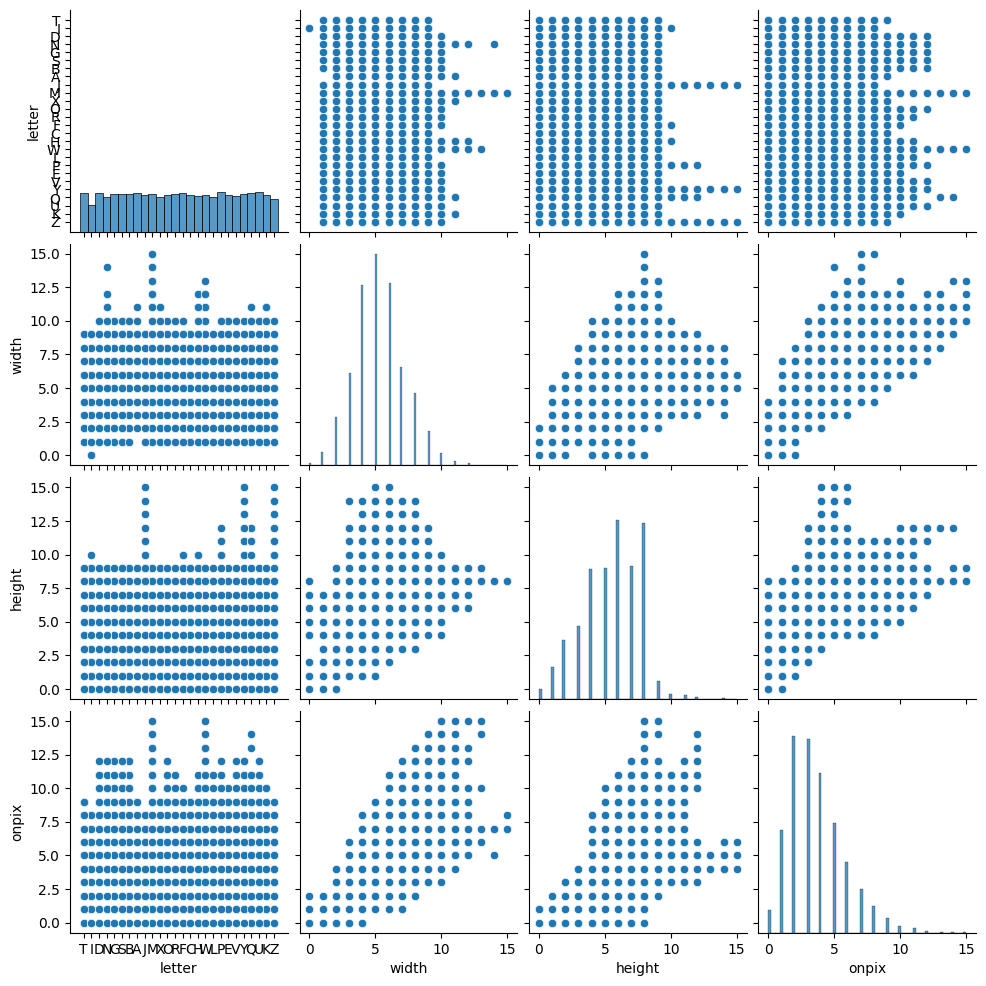

In [14]:
# Plot 1: Letter by width and height and onpix

sns.pairplot(df, vars = ['letter', 'width', 'height', 'onpix'])
plt.plot()

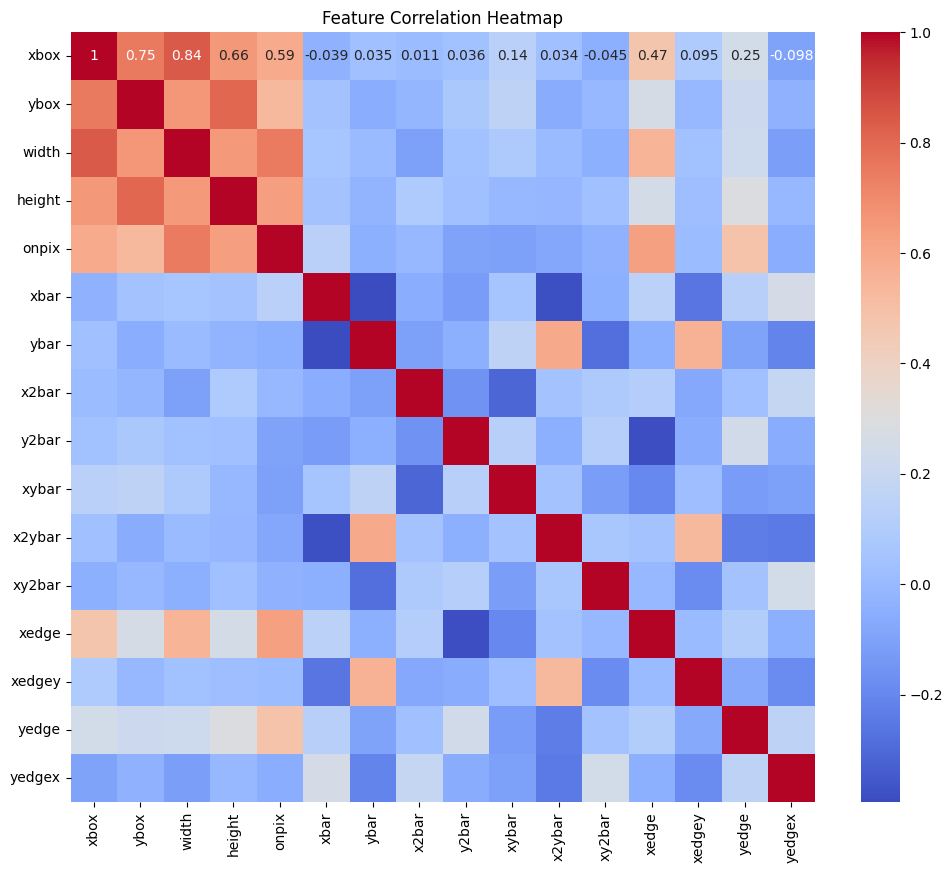

In [15]:
# Plot 2: Heatmap of numerical features

corr = df.drop(columns=['letter']).corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Model Implementation

### Split the dataset

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['letter']) #Features
y = df['letter'] # Target

# Encoding and Scaling the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow.keras.utils import to_categorical
# Performing Label Encoding before One-Hot Encoding because Label encoder maps string labels to integers.
#This is necessary because most one-hot encoders expect integer labels, not strings.
# Not using: pd.get_dummies(), as ould mismatch the output layer and isn't compatible with Keras loss functions.

# Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)  # One-hot encoding for multi-class

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

## Build ANN model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Hidden layer
model.add(Dense(26, activation='softmax'))  # Output layer (26 classes for A–Z)

## Compile the model

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [19]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
420/420 [==============================] - 4s 6ms/step - loss: 2.1545 - accuracy: 0.4370 - val_loss: 1.4351 - val_accuracy: 0.6225
Epoch 2/20
420/420 [==============================] - 2s 5ms/step - loss: 1.1563 - accuracy: 0.6994 - val_loss: 1.0372 - val_accuracy: 0.7008
Epoch 3/20
420/420 [==============================] - 2s 4ms/step - loss: 0.8995 - accuracy: 0.7531 - val_loss: 0.8782 - val_accuracy: 0.7376
Epoch 4/20
420/420 [==============================] - 2s 4ms/step - loss: 0.7684 - accuracy: 0.7837 - val_loss: 0.7757 - val_accuracy: 0.7731
Epoch 5/20
420/420 [==============================] - 2s 4ms/step - loss: 0.6786 - accuracy: 0.8050 - val_loss: 0.7002 - val_accuracy: 0.7965
Epoch 6/20
420/420 [==============================] - 2s 5ms/step - loss: 0.6128 - accuracy: 0.8235 - val_loss: 0.6471 - val_accuracy: 0.8099
Epoch 7/20
420/420 [==============================] - 2s 4ms/step - loss: 0.5594 - accuracy: 0.8386 - val_loss: 0.6012 - val_accuracy: 0.8300
Epoch 

## Make predictions

In [20]:
y_pred = model.predict(X_scaled)

584/584 [==============================] - 2s 3ms/step


## Evaluate the model

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# y_test and y_pred are continuous values

mse = mean_squared_error(y_onehot, y_pred)
mae = mean_absolute_error(y_onehot, y_pred)
r2 = r2_score(y_onehot, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.004978544544428587
Mean Absolute Error (MAE): 0.01254626177251339
R^2 Score: 0.8650864958763123


In [44]:
from sklearn.metrics import classification_report, accuracy_score

# Since output values are continuous, we must first convert them into binary format
# Threshold probabilities to get binary predictions
y_pred = (y_pred > 0.5).astype(int)

original_accuracy =  accuracy_score(y_onehot, y_pred)
original_classification = classification_report(y_onehot, y_pred)

# Evaluate
print("Accuracy:", accuracy_score(y_onehot, y_pred))
print("\nClassification Report:\n", classification_report(y_onehot, y_pred))

Accuracy: 0.8803835440325691

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       756
           1       0.95      0.83      0.88       730
           2       0.96      0.91      0.93       710
           3       0.91      0.85      0.88       760
           4       0.96      0.81      0.88       725
           5       0.94      0.83      0.88       752
           6       0.92      0.82      0.87       743
           7       0.93      0.73      0.82       704
           8       0.97      0.85      0.91       524
           9       0.99      0.89      0.93       715
          10       0.96      0.85      0.90       718
          11       0.96      0.89      0.92       673
          12       0.98      0.92      0.95       732
          13       0.96      0.89      0.93       688
          14       0.94      0.90      0.92       718
          15       0.96      0.90      0.93       782
          16       0.97    

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Perform Hyperparameter Tuning

In [23]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    
    # Input + Hidden Layers
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=256, step=32), 
                    activation=hp.Choice('activation_input', values=['relu', 'tanh']),
                    input_shape=(X_train.shape[1],)))

    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', 32, 256, step=32), 
                        activation=hp.Choice(f'activation_{i}', ['relu', 'tanh'])))
    
    # Output Layer
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Using softmax as it is multi-class

    # Compile
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',   # or categorical_crossentropy / mse based on task
        metrics=['accuracy']
    )
    
    return model

## Initialize and Run the Random Search Tuner

In [24]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # number of combinations to try
    executions_per_trial=1,
    directory='ann_tuning',
    project_name='hyperparam_search'
)

# Run search
tuner.search(X_scaled, y_onehot, 
             epochs=30, 
             validation_split=0.2, 
             batch_size=32,
             verbose=1)


Reloading Tuner from ann_tuning\hyperparam_search\tuner0.json


## Run the Hyperparameter Search

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Start search
tuner.search(
    X_scaled, y_onehot,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

## Loading the Best Tuned Model and Evaluating it

In [42]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

# Evaluate on test set
y_pred_best = best_model.predict(X_scaled)
y_pred_best = (y_pred_best > 0.5).astype(int)

best_accuracy = accuracy_score(y_onehot, y_pred_best)
best_classification = classification_report(y_onehot, y_pred_best)

print(f"\nBest Hyperparameters: {best_hyperparams.values}")
print(f"\nAccuracy: {accuracy_score}", accuracy_score(y_onehot, y_pred_best))
print(f"\nClassification Report:\n {classification_report}", classification_report(y_onehot, y_pred_best))

584/584 [==============================] - 2s 4ms/step

Best Hyperparameters: {'units_input': 96, 'activation_input': 'relu', 'num_hidden_layers': 3, 'units_0': 128, 'activation_0': 'tanh', 'learning_rate': 0.001, 'units_1': 256, 'activation_1': 'tanh', 'units_2': 224, 'activation_2': 'tanh'}

Accuracy: <function accuracy_score at 0x00000245820818A0> 0.9930897793014785

Classification Report:
 <function classification_report at 0x0000024582082D40>               precision    recall  f1-score   support

           0       1.00      0.99      0.99       756
           1       0.99      1.00      0.99       730
           2       1.00      1.00      1.00       710
           3       0.99      1.00      0.99       760
           4       1.00      0.99      0.99       725
           5       1.00      1.00      1.00       752
           6       0.99      0.99      0.99       743
           7       0.99      0.98      0.99       704
           8       0.99      0.98      0.99       524
       

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
train_loss, train_acc = best_model.evaluate(X_scaled, y_onehot, verbose=0)
test_loss, test_acc = best_model.evaluate(X_scaled, y_onehot, verbose=0)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy:  {test_acc:.3f}")

Train Accuracy: 0.993
Test Accuracy:  0.993


### Since train and test accuracy is nearly identical, model is not overfitting.

## Comparision of Original and Tuned model

In [45]:
print(f'Accuracy of original model: {original_accuracy}')
print(f'Accuracy of Tuned model: {best_accuracy}')

Accuracy of original model: 0.8803835440325691
Accuracy of Tuned model: 0.9930897793014785


In [46]:
print(f'Original model classification: {original_classification}')
print(f'Tuned model classification: {best_classification}')

Original model classification:               precision    recall  f1-score   support

           0       0.99      0.93      0.96       756
           1       0.95      0.83      0.88       730
           2       0.96      0.91      0.93       710
           3       0.91      0.85      0.88       760
           4       0.96      0.81      0.88       725
           5       0.94      0.83      0.88       752
           6       0.92      0.82      0.87       743
           7       0.93      0.73      0.82       704
           8       0.97      0.85      0.91       524
           9       0.99      0.89      0.93       715
          10       0.96      0.85      0.90       718
          11       0.96      0.89      0.92       673
          12       0.98      0.92      0.95       732
          13       0.96      0.89      0.93       688
          14       0.94      0.90      0.92       718
          15       0.96      0.90      0.93       782
          16       0.97      0.94      0.96       

## Insights

These optimizations helped the tuned model to generalize better, shown by the near-equal accuracy on both the training and test sets. 

Unlike the original model, the tuned version learned faster and converged to a lower loss, with reduced risk of overfitting due to proper regularization and learning rate control.

The improvement in F1-score and recall indicates that the tuned model also made fewer false negatives.